# Import libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions.tools import load_json

# Import RAW data with description

In [22]:

data = load_json('../data/train/train_descripcion_accents.json')
# Now cast data to a DataFrame
df = pd.DataFrame(data)
print(df.shape)
df.head()

(50099, 5)


id_oferta                   categoria  \
0  ef5a8ae0a743018628df9bd53893bb  Administracion de empresas   
1  47137c06a640348ca4cb7dcbf938b1             Sanidad y salud   
2  cdfb72672340819a6721db72eee187          Comercial y ventas   
3  5746210e854264aaca9452f4d377a4           Ventas al detalle   
4  8a1bda0c91438bb4133f32e392a1ce           Ventas al detalle   

       subcategoria                                 descripcion_oferta  \
0    Administracion  Empresa de caracter internacional solicita adm...   
1  Medicina general  Las funciones a desempenar son las propias del...   
2         Comercial  Buscamos persona para puesto de Chofer -Repart...   
3  Venta al detalle  Abrimos proceso de seleccion para dependiente ...   
4  Venta al detalle  Tus funciones principales seran:  - Atencion a...   

   id_puesto_esco_ull  
0                1634  
1                 611  
2                2825  
3                1984  
4                1984

# Get the words and count of them in the full dataframe

In [23]:
from functions.descripcion import clean_descripcion
df = clean_descripcion(df)

/home/fulp/clasificador_ofertas_empleo/clasificador-ofertas-empleo-modelo/notebooks/functions/descripcion.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['descripcion_oferta'] = df['descripcion_oferta'].str.replace(r'\s+', ' ')  # Remove additional spaces
/home/fulp/clasificador_ofertas_empleo/clasificador-ofertas-empleo-modelo/notebooks/functions/descripcion.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['descripcion_oferta'] = df['descripcion_oferta'].str.replace('.', ' ').replace(","," ")  # Replace "." and "," with " "
/home/fulp/clasificador_ofertas_empleo/clasificador-ofertas-empleo-modelo/notebooks/functions/descripcion.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['descripcion_oferta'] = df['descrip

# Cast the type of the column ID from float to int

In [24]:
# Now cast id_puesto_esco_ull to int (delete the comma and the number after it)
df['id_puesto_esco_ull'] = df['id_puesto_esco_ull'].astype(int)
df.head()

id_oferta                   categoria  \
0  ef5a8ae0a743018628df9bd53893bb  Administracion de empresas   
1  47137c06a640348ca4cb7dcbf938b1             Sanidad y salud   
2  cdfb72672340819a6721db72eee187          Comercial y ventas   
3  5746210e854264aaca9452f4d377a4           Ventas al detalle   
4  8a1bda0c91438bb4133f32e392a1ce           Ventas al detalle   

       subcategoria                                 descripcion_oferta  \
0    Administracion  Empresa de caracter internacional solicita adm...   
1  Medicina general  Las funciones a desempenar son las propias del...   
2         Comercial  Buscamos persona para puesto de Chofer -Repart...   
3  Venta al detalle  Abrimos proceso de seleccion para dependiente ...   
4  Venta al detalle  Tus funciones principales seran: - Atencion al...   

   id_puesto_esco_ull                           descripcion_oferta_words  
0                1634  [empresa, de, caracter, internacional, solicit...  
1                 611  [las, funciones, a, desempenar, son, las, prop...  
2                2825  [buscamos, persona, para, puesto, de, chofer, ...  
3                1984  [abrimos, proceso, de, seleccion, para, depend...  
4                1984  [tus, funciones, principales, seran, atencion,...

# Create a dict with the words (keys) and the count (values)

In [25]:
from functions.descripcion import create_words_count_fulldataset
words_dict = create_words_count_fulldataset(df)

# Create by ID a dict with words (keys) and count (values)

In [26]:
from functions.descripcion import create_words_count_groupdataset
words_group_dict = create_words_count_groupdataset(df)

# Get the stopwords (Spanish + English)

In [27]:
# Get a list of words which is the spanish and english stopword from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')
stop_words.extend(stopwords.words('english'))

# Filter stopwords

In [28]:
from functions.descripcion import filter_stop_words
words_dict = filter_stop_words(words_dict, stop_words)

# Filter stopwords by ID

In [29]:
from functions.descripcion import filter_stop_words_grouped
words_group_dict = filter_stop_words_grouped(words_group_dict, stop_words)

# Sort and delete by count

In [30]:
def sort_by_count(words_dict):
    return sorted(words_dict.items(), key=lambda x: x[1], reverse=True)
def delete_words_by_count(words_dict, min_count, max_count):
    output_words_dict = {}
    for word in list(words_dict):
        if words_dict[word] >= min_count and words_dict[word] <= max_count:
            output_words_dict[word] = words_dict[word]
    return output_words_dict
            
print("Before: " + str(len(words_dict)))
words_dict_deleted = delete_words_by_count(words_dict, 5, 1500)
print("After: " + str(len(words_dict_deleted)))

Before: 43596
After: 19245


# Plot words VS count

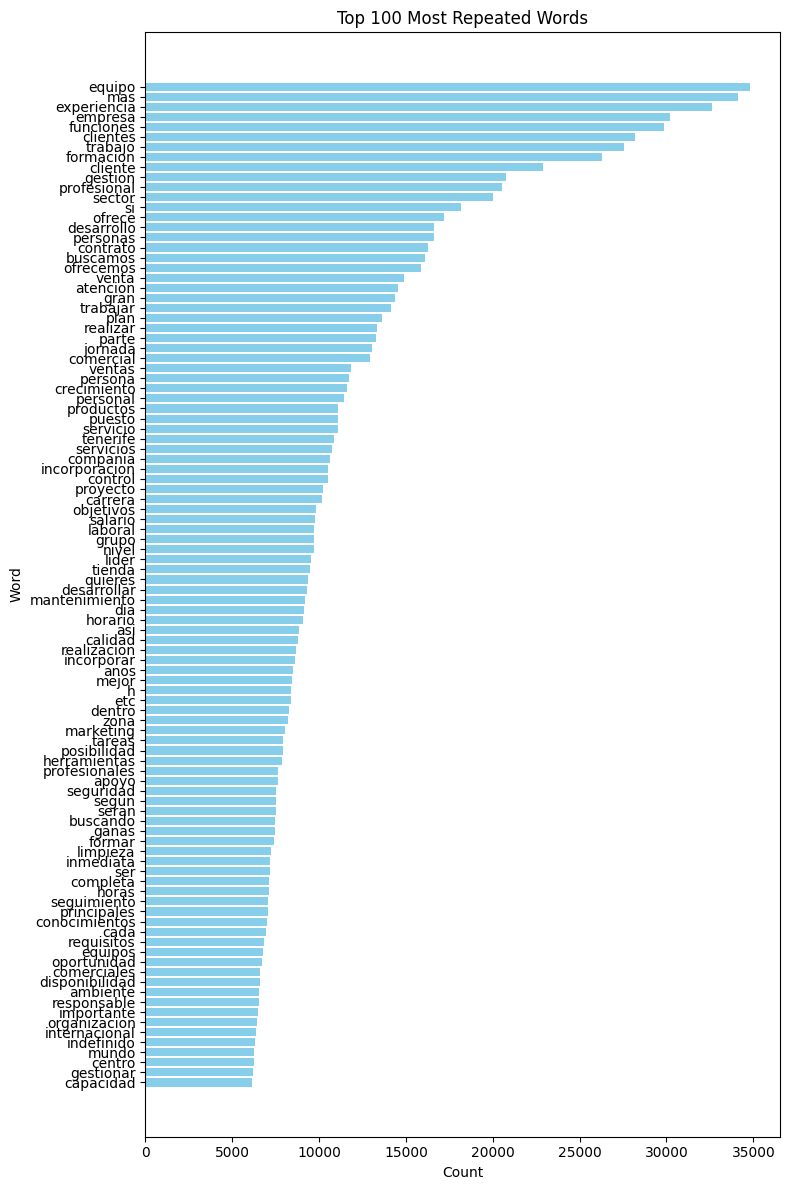

In [31]:
from functions.descripcion import plot_words_count
plot_words_count(words_dict, 100)

# Plot words VS count by ID

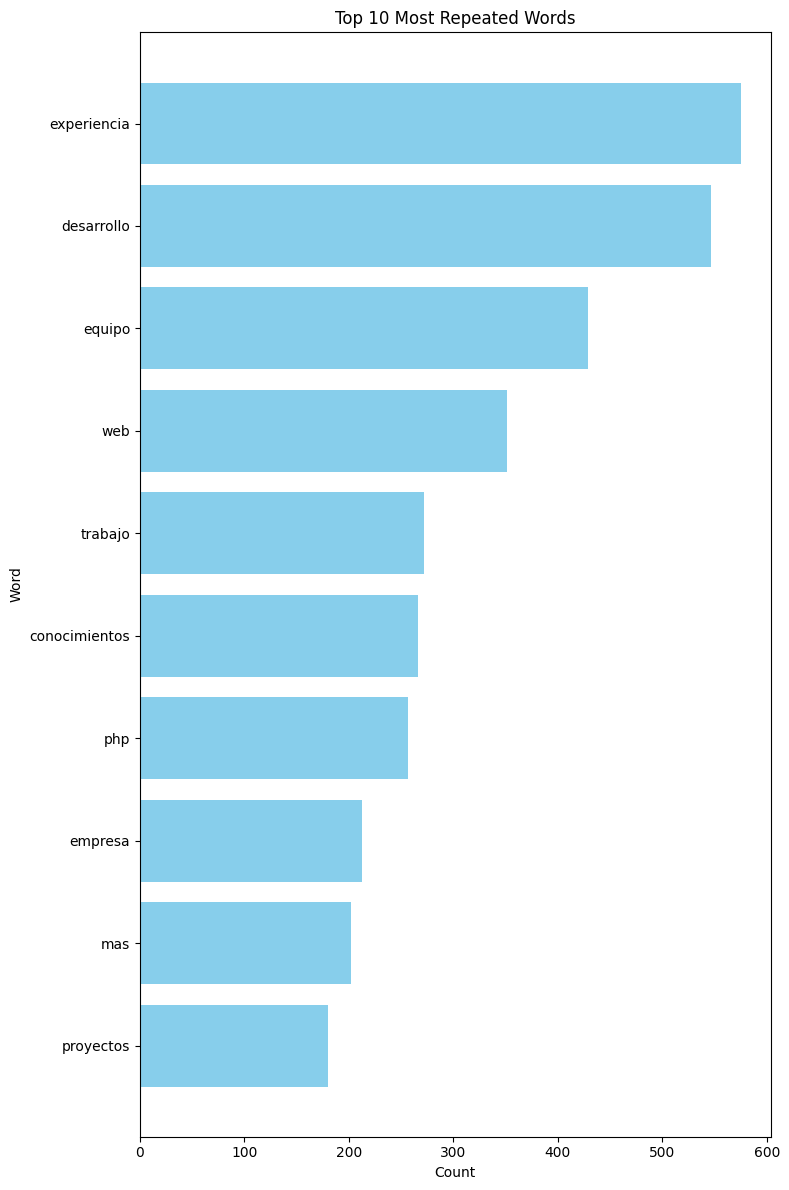

In [32]:
# from functions.descripcion import plot_words_count_grouped
def plot_words_count_grouped(words_group, id, N=50):
    try:
        plot_words_count(words_group[id], N)
    except:
        print('The id ' + str(id) + ' is not in the dataset')
plot_words_count_grouped(words_group_dict, 941, 10)

# Add column formated

In [33]:
from functions.descripcion import create_palabras_empleto_texto_column
# Introduce into the DataFrame as column palabras_empleo_texto
df['palabras_empleo_texto'] = create_palabras_empleto_texto_column(df, words_dict_deleted)

# Save dataframe

In [34]:
columns = ['id_oferta','id_puesto_esco_ull','categoria','subcategoria','palabras_empleo_texto']
# Save as json as a list of dict
df[columns].to_json('../data/train/train_palabras_empleo_texto.json', orient='records')